# 统计矩-偏度和峰度
By Evgenia "Jenny" Nitishinskaya, Maxwell Margenot, and Delaney Granizo-Mackenzie.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

Notebook released under the Creative Commons Attribution 4.0 License.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

有时均值和方差不足以描述一个分布。当我们计算方差时，我们把离均值的偏差平方。在较大偏差的情况下，我们不知道它们可能是正的还是负的。这就是分布的偏态和对称性的由来。一个分布是<i>对称的</i>如果均值两边的部分是彼此的镜像。例如，正态分布是对称的。定义均值$\mu$和标准差$\sigma$的正态分布为
$$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$
我们可以画出它来确认它是对称的:

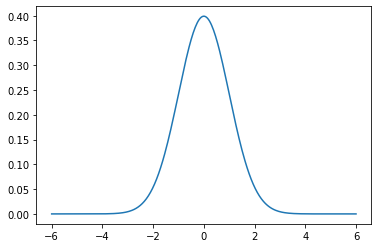

In [2]:
# Plot a normal distribution with mean = 0 and standard deviation = 2
xs = np.linspace(-6,6, 300)
normal = stats.norm.pdf(xs)
plt.plot(xs, normal);

一个不对称的分布叫做<i>偏态的</i>。例如，一个分布可以有许多小的正值和几个大的负值(负偏态)，或者相反(正偏态)，但均值仍然是0。对称分布的偏度为0。正偏态单模态分布具有>中值>模式的性质。负偏态的单峰分布则相反，均值<中值<模式。对于对称的单峰分布来说，这三个是相等的。

偏度的显式公式为:
$$ S_K = \frac{n}{(n-1)(n-2)} \frac{\sum_{i=1}^n (X_i - \mu)^3}{\sigma^3} $$

其中$n$是观测值的个数，$\mu$是算术平均值，$\sigma$是标准差。这个量的符号描述了如上所述的偏态方向。我们可以画一个正偏态分布和一个负偏态分布来看看它们是怎样的。对于单峰分布，负偏态通常表示左侧尾部较胖，而正偏态则表示右侧尾部较胖。

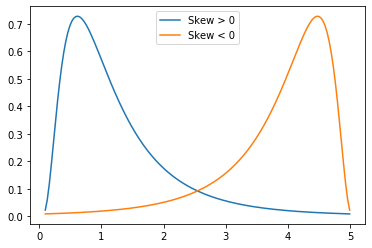

In [3]:
# Generate x-values for which we will plot the distribution
xs2 = np.linspace(stats.lognorm.ppf(0.01, .7, loc=-.1), stats.lognorm.ppf(0.99, .7, loc=-.1), 150)

# Negatively skewed distribution
lognormal = stats.lognorm.pdf(xs2, .7)
plt.plot(xs2, lognormal, label='Skew > 0')

# Positively skewed distribution
plt.plot(xs2, lognormal[::-1], label='Skew < 0')
plt.legend();

尽管在绘制离散数据集时，偏态不太明显，但我们仍然可以计算它。例如，下面是2012-2014年标准普尔500指数回报率的偏斜、平均值和中位数。注意，偏度是负的，所以均值小于中值。

Skew: -0.2001282729022691
Mean: 0.0006616233995904123
Median: 0.0007118475507648103


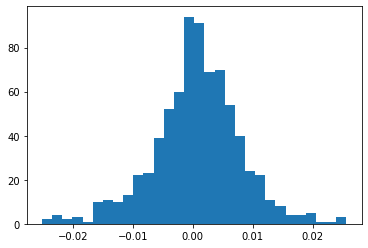

In [6]:
import pandas_datareader.data as data
start = '2012-01-01'
end = '2015-01-01'
pricing = data.get_data_yahoo('SPY', start, end)['Close']
returns = pricing.pct_change()[1:]

print( 'Skew:', stats.skew(returns))
print( 'Mean:', np.mean(returns))
print ('Median:', np.median(returns))

plt.hist(returns, 30);

# 峰度

峰度是用来测量偏离均值的形状。一般来说，它描述了一个分布的峰值是如何与正态分布相比较的，称为常态峰。所有正态分布，不论均值和方差，其峰度都是3。尖峰态分布(峰度>3)有高峰且尾部肥厚，而扁峰态分布(峰度< 3)较宽。但是，有时会使用超过正态分布的峰度(峰度- 3)，这是`scipy`中的默认值。与正态分布相比，瘦峰态分布有更频繁的远离均值的大跳跃，而扁峰态分布则有更少的大跳跃。

Excess kurtosis of leptokurtic distribution: 3.0
Excess kurtosis of mesokurtic distribution: 0.0
Excess kurtosis of platykurtic distribution: -0.5937628755982794


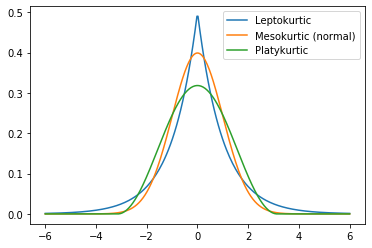

In [8]:
# Plot some example distributions
plt.plot(xs,stats.laplace.pdf(xs), label='Leptokurtic')
print('Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(moments='k'))) 
plt.plot(xs, normal, label='Mesokurtic (normal)')
print('Excess kurtosis of mesokurtic distribution:', (stats.norm.stats(moments='k'))) 
plt.plot(xs,stats.cosine.pdf(xs), label='Platykurtic')
print ('Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(moments='k')))
plt.legend();

峰度的公式为
$$ K = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) $$

而过度峰度w为
$$ K_E = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) - \frac{3(n-1)^2}{(n-2)(n-3)} $$

对于大量样本，其过度峰度近似为

$$ K_E \approx \frac{1}{n} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} - 3 $$

由于我们考虑的是完美的连续分布，这就是峰度的形式。然而，对于一组为正态分布绘制的样本，我们将使用第一个定义，并且(过度)峰度将仅近似为0。

我们可以用`scipy`来找出标普500指数过去的过度峰度。

In [9]:
print ("Excess kurtosis of returns: ", stats.kurtosis(returns))

Excess kurtosis of returns:  1.1574301106641744


回报的柱状图显示了离均值3个标准差之外的显著的观察结果，多个大的峰值，所以我们不应该对峰度表示瘦峰态分布感到惊讶。

# 其他标准化的矩

方差、偏度和峰度具有相似的形式并非巧合。它们是第一个也是最重要的标准化时刻，$k$th就是其中之一
$$ \frac{E[(X - E[X])^k]}{\sigma^k} $$

第一个标准化矩总是0 $(E[X - E[X]] = E[X] - E[E[X]] = 0)$，所以我们只关心第二个到第四个。所有的标准化矩都是描述分布的无量纲数，特别是可以用来量化分布与正常(标准化矩$0, \sigma, 0, \sigma^2$)的接近程度。

# 使用Jarque-Bera进行正态性测试

Jarque-Bera检验是一种常见的统计检验，用来比较样本数据是否具有类似于正态分布的偏度和峰度。我们可以用标准普尔500的收益来计算p值验证其是否来自正态分布。

Jarque Bera检验的零假设是，数据来自正态分布。因此，如果p值很低，它可能会因为没有捕获非正态过程而出错。为了安全起见，在使用测试时增加您的截止值是有好处的。

记住要将p值视为二进制的，不要试图读取它们或比较它们。我们用0.05作为p值的截止值。

## 测试校准

请记住，不同的编程语言对每个测试的编写略有不同。你可能不知道测试数据来自正态分布的是零假设还是备择假设。建议您使用`?`符号加上在线搜索来查找关于测试的文档，另外，通过检查模拟数据并确保它给出正确的答案来校准测试通常是一个好主意。我们现在就开始吧。

In [10]:
from statsmodels.stats.stattools import jarque_bera

N = 1000
M = 1000

pvalues = np.ndarray(N)

for i in range(N):
    # Draw M samples from a normal distribution 
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue
    
# count number of pvalues below our default 0.05 cutoff
num_significant = len(pvalues[pvalues < 0.05])

print(float(num_significant) / N) 

0.056


很好，如果正确校准，我们应该预期在0.05的显著性水平下错误$5\%$的时间，这是非常接近的。这意味着测试工作与我们预期的一样。

In [11]:
_, pvalue, _, _ = jarque_bera(returns)

if pvalue > 0.05:
    print('The returns are likely normal.') 
else:
    print( 'The returns are likely not normal.')

The returns are likely not normal.


这告诉我们，标准普尔500指数的回报率可能不服从正态分布。